<a href="https://colab.research.google.com/github/leearzuaga/Projects/blob/main/VisualizingEarningsByCollegeMajor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Earnings By College Major Using Visualizations

##### In this project, I'll be using Pandas (a data analysis library in python) plotting functionality to quickly visually explore data for job outcomes of students who graduated from college between 2010 and 2012 (original dataset can be found [here]('https://github.com/fivethirtyeight/data/tree/master/college-majors')). 

##### The dataset I'll be working with represents a different major in college and contains information on gender diversity, employment rates, median salaries, etc. Below is a data dictionary for some of the columns in our dataset:

column | description 
--- | ---
Rank | Rank by median earnings (the dataset is ordered by this column).
Major_code | Major code.
Major | Major description.
Major_category | Category of major.
Total | Total number of people with major.
Sample_size | Sample size (unweighted) of full-time.
Men | Male graduates.
Women | Female graduates.
ShareWomen | Women as share of total.
Employed | Number employed.
Median | Median salary of full-time, year-round workers.
Low_wage_jobs | Number in low-wage service jobs.
Full_time | Number employed 35 hours or more.
Part_time | Number employed less than 35 hours. 

##### Lets get started.

# Importing Libraries and Reading In Data

In [1]:
# Libraries

import pandas as pd
from matplotlib import pyplot as plt 

%matplotlib inline  # allows plots to be displayed inline within this notebook

UsageError: unrecognized arguments: # allows plots to be displayed inline within this notebook


In [2]:
# Importing our data in

recent_grads = pd.read_csv('recent-grads.csv')

# Exploring Our Data

##### Before creating any data visualizations to explore our data, it's always a good idea to just get a high-level view of the data your working with. 

In [3]:
print(recent_grads.shape)  # returns the 'shape' or structure of our dataset -- 173 rows and 21 columns
print()
recent_grads.info()  # returns information regarding all the columns in our dataset

(173, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median      

In [4]:
recent_grads.iloc[0]  # returns the first row of our dataset formatted as a table

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [5]:
recent_grads.describe() # returns summary statistics for all the columns

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads.head()  # returns the first 5 rows of our dataset

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
recent_grads.tail()  # returns the last 5 rows of our dataset

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


##### After exploring our dataset at a high-level, we get a much better sense of the data we're working with and how its organized. For example, looking over the output above, we can see our dataset consists of 173 rows and 21 columns. Out of those 21 columns, it appears 4 of them ('Total', 'Men', 'Women', 'ShareWomen') have at least 1 null value (we'll have to look into this further). Lastly, we can see that all but 2 columns are of numeric data types. 

# Handling Missing Values

##### I noticed in the previous section how after exploring our dataset initially, it appears at least 4 columns have 1 null-value. Matplotlib -- which is the library I'm going to use to visualize our data -- expects columns of values we pass in to have matching lengths. Missing values will cause matplotlib to throw errors so as a result, I will remove or drop any rows containing missing or null values. 

In [8]:
# First I'm going to look up the number of rows in our dataset and assign 
# the value to a new variable

raw_data_count = recent_grads.shape[0]

raw_data_count

173

In [9]:
# Here I'm going to drop rows containing missing values and assing the 
# result back to our recent_grads dataset

recent_grads = recent_grads.dropna()

In [10]:
# Looking up the number of rows in our dataset now that its cleaned and 
# assinging the result to a new variable

cleaned_data_count = recent_grads.shape[0]

cleaned_data_count

172

##### If we compare our dataset before and after dropping rows containing missing values, we can see that only 1 row was removed.

# Pandas, Scatter Plots

##### In this section I'll begin plotting some data and seeing what insights I may be able to extract. I'll begin by generating some scatter plots to explore the relationships (if any) between various columns.

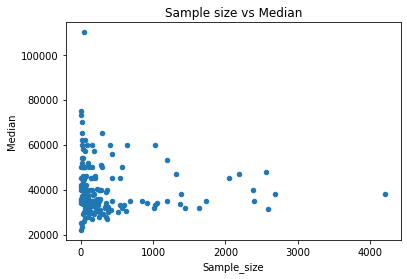

In [11]:
recent_grads.plot(x = 'Sample_size', y = 'Median', 
                        kind = 'scatter', 
                        title = 'Sample size vs Median')

plt.show()

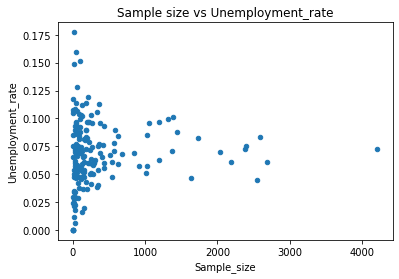

In [12]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', 
                        kind = 'scatter', 
                        title = 'Sample size vs Unemployment_rate')

plt.show()

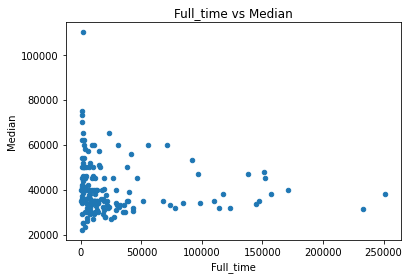

In [13]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter', 
                  title = 'Full_time vs Median')

plt.show()

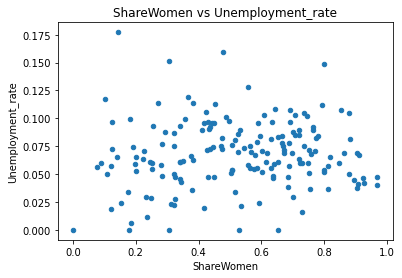

In [14]:
recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', 
                        kind = 'scatter', 
                        title = 'ShareWomen vs Unemployment_rate')

plt.show()

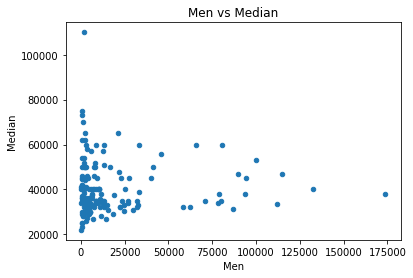

In [15]:
recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter', 
                  title = 'Men vs Median')

plt.show()

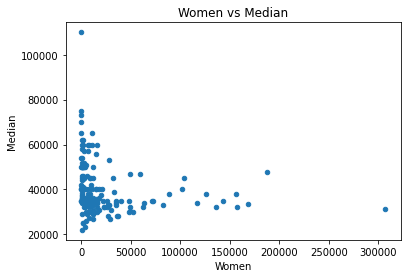

In [16]:
recent_grads.plot(x= 'Women', y = 'Median', kind = 'scatter', 
                  title = 'Women vs Median')

plt.show()

##### After looking over each of the scatter plots above, it appears that none of the relationships we looked at are correlated. 

##### Lets explore the following question to see if we have better luck finding some insights.



*   Do students in more popular majors make more money?


##### In order to answer whether or not more popular majors make more money, we're going to need to plot the relationship between the 'Total' column -- which represents the total number of people with major -- and the 'Median' column -- which represents median salary of full-time, year-round workers



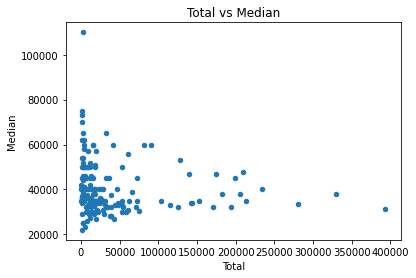

In [29]:
recent_grads.plot(x = 'Total', y = 'Median', kind = 'scatter', 
                  title = 'Total vs Median')

plt.show()

##### Again, there appears to be no correlation between the most popular majors and the amount of money people make from those majors. While these two columns aren't correlated, we can still answer our original question. Notice how the majority of the values are bunched up to the left side of the plot. Also notice how the highest Median values are also the values with the lowest Total. This inidicated to me that the most popular majors do not lead to the highest earning careers. 

##### Below you'll see a table with the top 10 majors by popularity (Total) and top 10 majors by Median. This should confirm our observation from our scatter plot.

In [31]:
top_10_popular_majors = recent_grads[['Major', 'Total', 'Sample_size', 'Median']].sort_values('Total', ascending = False).head(10)
top_10_salary_majors = recent_grads[['Major', 'Total', 'Sample_size', 'Median']].sort_values('Median', ascending = False).head(10)

top_10_popular_majors

,Major,Total,Sample_size,Median
145,PSYCHOLOGY,393735.0,2584,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,4212,38000
123,BIOLOGY,280709.0,1370,33400
57,GENERAL BUSINESS,234590.0,2380,40000
93,COMMUNICATIONS,213996.0,2394,35000
34,NURSING,209394.0,2554,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,2684,38000
40,ACCOUNTING,198633.0,2042,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,1436,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,1387,38000


In [32]:
top_10_salary_majors

,Major,Total,Sample_size,Median
0,PETROLEUM ENGINEERING,2339.0,36,110000
1,MINING AND MINERAL ENGINEERING,756.0,7,75000
2,METALLURGICAL ENGINEERING,856.0,3,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,16,70000
4,CHEMICAL ENGINEERING,32260.0,289,65000
5,NUCLEAR ENGINEERING,2573.0,17,65000
6,ACTUARIAL SCIENCE,3777.0,51,62000
7,ASTRONOMY AND ASTROPHYSICS,1792.0,10,62000
10,COMPUTER ENGINEERING,41542.0,399,60000
13,MATERIALS SCIENCE,4279.0,22,60000


##### As the scatter plot illustrated and these tables confirm, the most popular majors don't translate to higher Median salaries while the lesser popular major do. To me this makes sense. The harder majors are more rigorous and demand more aptitude. Individuals determined enough to complete these programs are rewarded by way of higher paying jobs.

# Pandas, Histograms

##### In this section I'll begin plotting more data but instead of finding relationships, we'll explore the distribution of values for various columns to try and extract some insights. I'll note my observations of each plot as I go.

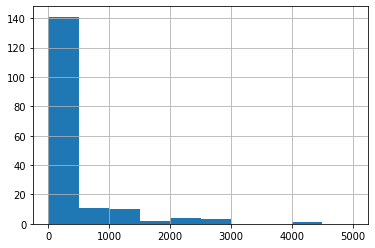

In [80]:
recent_grads['Sample_size'].hist(range=(0,5000))

##### The 'Sample_size' column has a wide range of values. The vast majority of values fall between 0 and 500. The distribution is heavily skewed left.

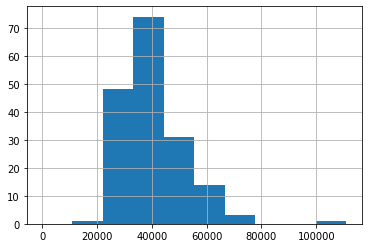

In [81]:
recent_grads['Median'].hist(range=(0,111000))

##### We can see from the 'Median' column that the majority of values fall between 30,000 and 40,000. We see one outlier way out there to the right of the histogram. We know from the previous section that major is Petroleum Engineering. 

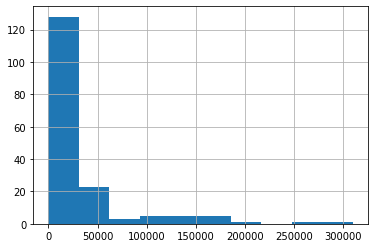

In [83]:
recent_grads['Employed'].hist(range=(0,310000))

##### We can see from this histogram that the vast majority of majors employ less than 50,000 people.

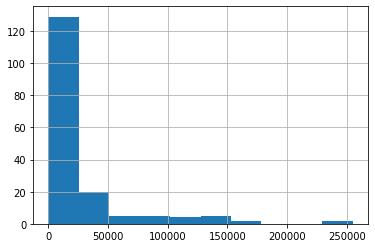

In [84]:
recent_grads['Full_time'].hist(range=(0,255000))

##### Like the 'Employed' column, the 'Full_time' columns is also heavily skewed left and the vast majority of values fall below 50,000.

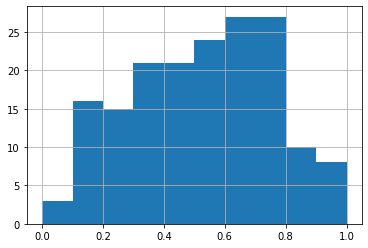

In [91]:
recent_grads['ShareWomen'].hist(bins = 10, range=(0,1))

##### We can see from this histogram that the 'ShareWomen' column has the highest frequency of its values fall between 0.6 and 0.8. 

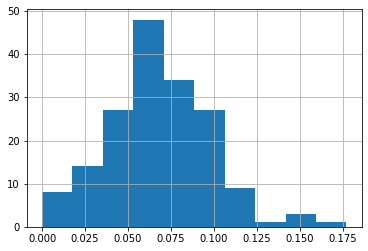

In [96]:
recent_grads['Unemployment_rate'].hist()

##### We can see from this histogram that the distribution of values are pretty close to being normally distributed. 

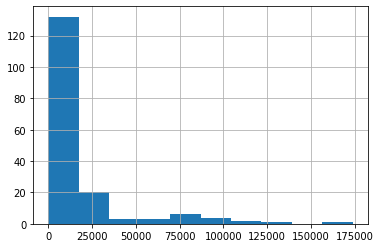

In [97]:
recent_grads['Men'].hist()

##### We can see that the distribution of values is heavily skewed left. 

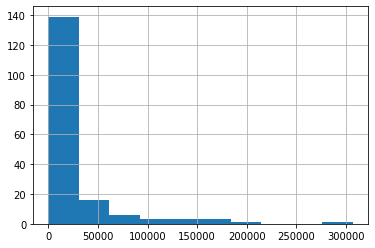

In [98]:
recent_grads['Women'].hist()

##### We can see that the distribution of values are heavily skewed left.

# Pandas, Scatter Matrix Plot

##### For the rest of this notebook. I will use various plots to showoff some of the cool features Pandas and Matplotlib offers to visualize our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75c4b7d668>,
      dtype=object)

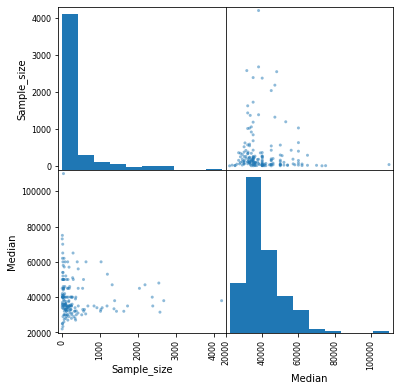

In [99]:
from pandas.plotting import scatter_matrix  # we import the scatter_matrix module that will allow us to create our plot

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75c4ac1898>,
      dtype=object)

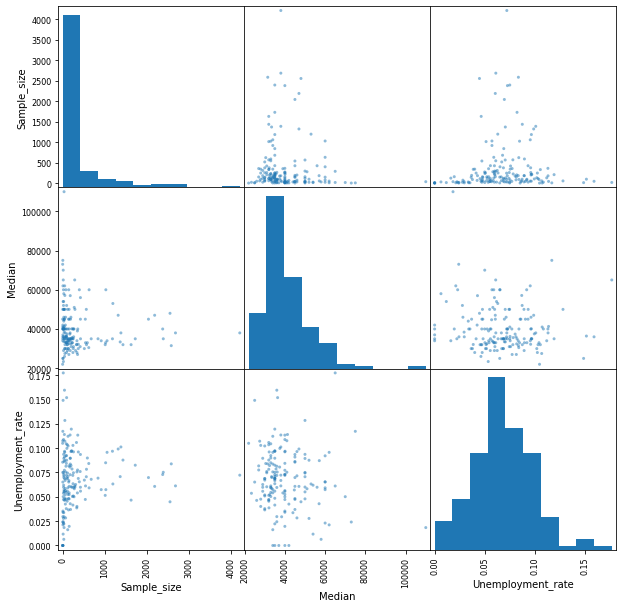

In [100]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

# Pandas, Bar Plots

##### Like the previous section, here I am just showing off some of Pandas and Matplotlibs cool data visualization features with bar plots.

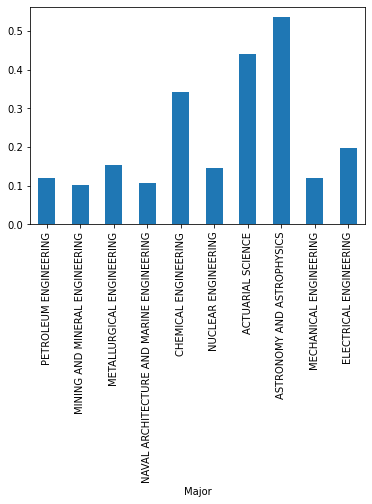

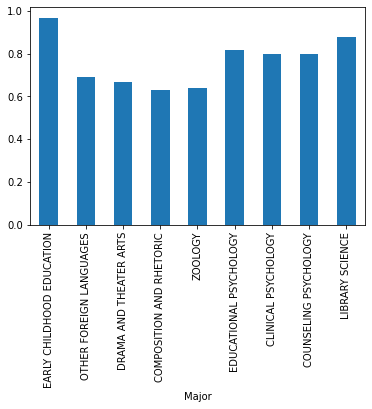

In [102]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)